In [45]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
# Load CSV file
df = pd.read_csv("DHT22_data.csv")
df

,Timestamp,Humidity,Temperature
0,20240722005331,57.9,18.5
1,20240722005341,57.6,18.5
2,20240722005351,57.5,18.6
3,20240722005401,58.2,18.7
4,20240722005411,57.6,18.7
...,...,...,...
2690,20240722082211,54.3,21.1
2691,20240722082221,54.3,21.1
2692,20240722082231,54.2,21.1
2693,20240722082241,54.2,21.1


#### Before Removing any Outliers

In [42]:
# Create an instance Linear Regresison
#model = LinearRegression()

# Get the predictor and the output
X = df["Temperature"].values.reshape(-1,1)
y = df["Humidity"]

# Fit the model
model.fit(X,y)

LinearRegression()

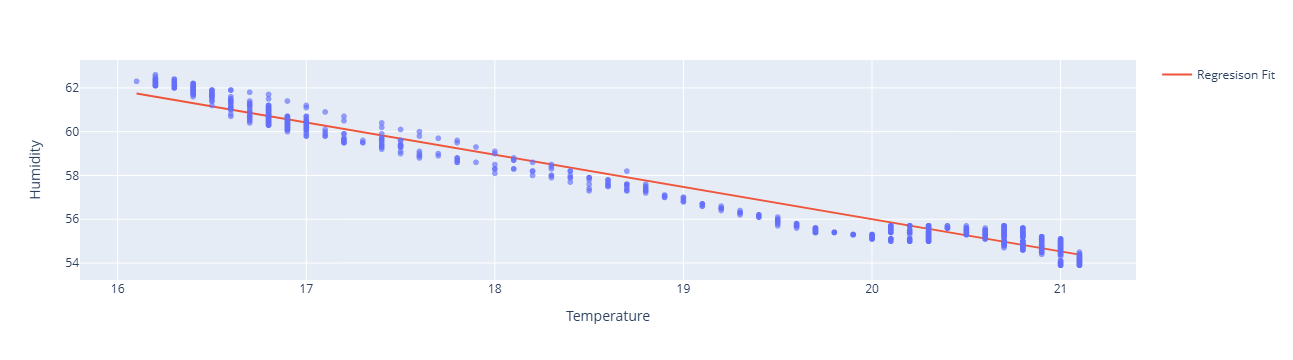

In [44]:
# Draw a scatter plot as well as the regression line
X_regression_line = np.linspace(start = X.min() , stop = X.max() , num = 100)
y_regression_line = model.predict(X_regression_line.reshape(-1,1))

fig = px.scatter(df, x = "Temperature" , y = "Humidity" , opacity = 0.65)
fig.add_traces(go.Scatter(x = X_regression_line , y = y_regression_line , name = "Regresison Fit"))
fig.show()

In [50]:
# Calculate the MSE of the this model
# Make predictions based on the original data
y_pred = model.predict(X)

mse = mean_squared_error(y,y_pred)
print(f"Mean Square Error of the original model: {mse}")

Mean Square Error of the original model: 0.18567125120983452


In [52]:
# Calculate the R^2 score of the model
print(f"R^2 score of the original model: {model.score(X,y)}")

R^2 score of the original model: 0.9654677620565366


#### The model's performance, as indicated by a low Mean Squared Error (MSE) and a high accuracy score, suggests that it is making predictions with a good degree of precision and reliability. This strong performance implies that the original feature 'Temperature' is effectively capturing the underlying relationship between temperature and humidity. Therefore, 'Temperature' serves as a valuable predictor for 'Humidity' in the model.

#### Removing Outliers

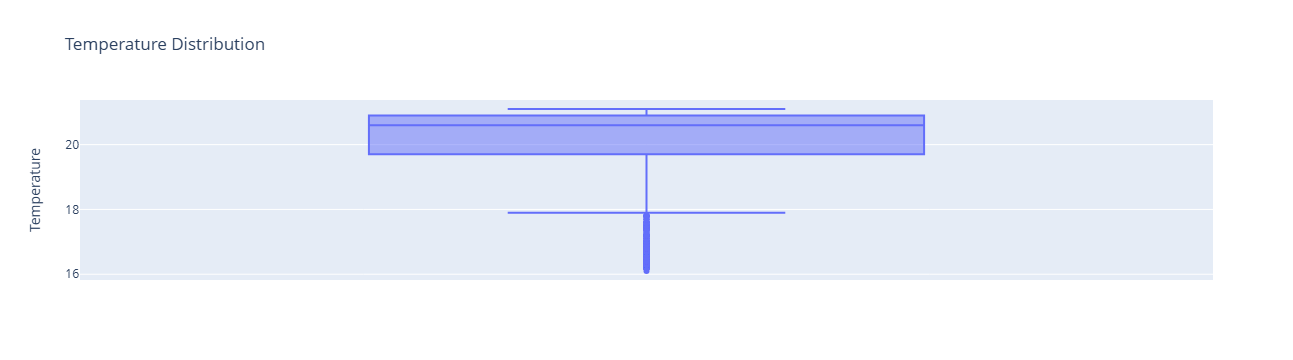

In [61]:
# Create a box plot to check the distribution and outliers
fig_box = px.box(df, y = "Temperature" , title = "Temperature Distribution")
fig_box.show()


#### As observed in our generated box plot, the lower bound for our data is 17.9, which we identified using the interactive features of the plot. However, it's clear that there are several data points falling below this lower bound, indicating the presence of outliers. These outliers can perhaps skew our analysis and potentially lead to inaccurate results so we need to filter out those data points.

In [83]:
filtered_df = df[df["Temperature"] >= 17.9]
filtered_df

,Timestamp,Humidity,Temperature
0,20240722005331,57.9,18.5
1,20240722005341,57.6,18.5
2,20240722005351,57.5,18.6
3,20240722005401,58.2,18.7
4,20240722005411,57.6,18.7
...,...,...,...
2690,20240722082211,54.3,21.1
2691,20240722082221,54.3,21.1
2692,20240722082231,54.2,21.1
2693,20240722082241,54.2,21.1


In [84]:
# Create a model Linear Regression model
model_filter = LinearRegression()

# Get the predictor and the output of the filter dataframe
X_filter = filtered_df["Temperature"].values.reshape(-1,1)
y_filter = filtered_df["Humidity"]

# Fit the model
model_filter.fit(X_filter,y_filter)

LinearRegression()

In [85]:
X_regression_filter = np.linspace(start = X_filter.min() , stop = X_filter.max() , num = 100 )
y_regression_filter = model.predict(X_regression_filter.reshape(-1,1))

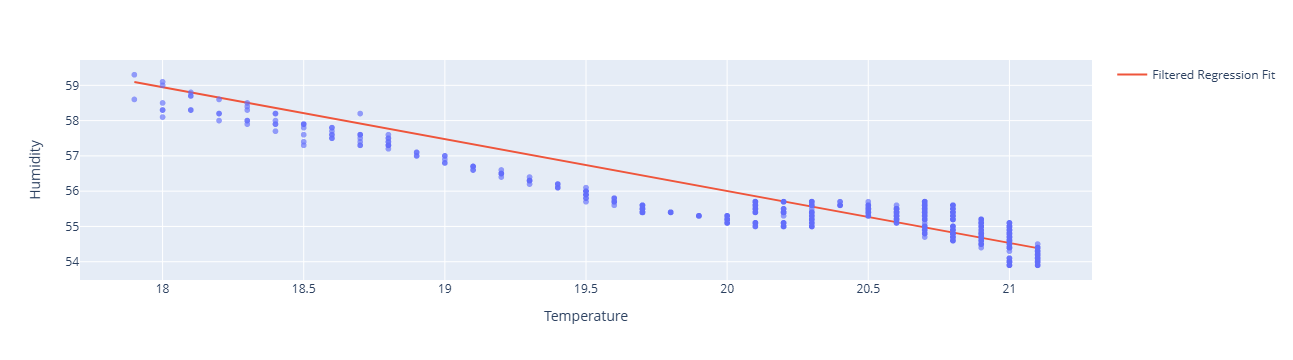

In [86]:
# Draw a s scatter plot as well as the regression line
fig_filter = px.scatter(filtered_df, x = "Temperature" , y = "Humidity" , opacity = 0.65)
fig_filter.add_traces(go.Scatter(x = X_regression_filter , y = y_regression_filter , name ="Filtered Regression Fit"))
fig_filter.show()

In [87]:
# Calculate the MSE of the this model
# Make predictions based on the filtered data frame
y_pred_filter = model_filter.predict(X_filter)

mse_filter= mean_squared_error(y_filter,y_pred_filter)
print(f"Mean Square Error of the filtered model: {mse_filter}")

Mean Square Error of the filtered model: 0.12422197252908723


In [88]:
# Calculate the R^2 score of the model
print(f"R^2 score of the filtered model: {model_filter.score(X_filter, y_filter)}")

R^2 score of the filtered model: 0.7287189918274133


#### After filtering the data and implementing the Linear Regression model, we noticed a modest drop in Mean Squared Error (MSE), indicating a minor improvement in prediction precision. However, this increase came at a considerable cost: the model's accuracy declined from 0.965 to 0.729. This significant loss in accuracy suggests that the process of deleting outliers may have unintentionally deleted important data points from the 'Temperature' column. 

#### Removing Outliers Completely using IQR

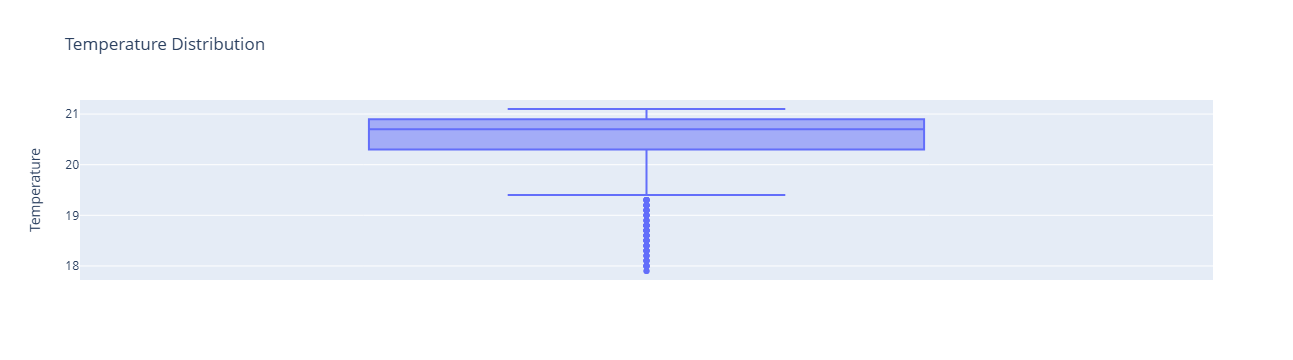

In [89]:
# Create a box plot to check distribution and outliers
fig_box_rm = px.box(filtered_df , y = "Temperature" , title = "Temperature Distribution")
fig_box_rm.show()

#### Our generated box plot demonstrates that a single round of outlier elimination was insufficient, as the freshly generated box plot still contains many outliers. To resolve this, we will use the Interquartile Range (IQR) methodology, which is a more reliable means of detecting and deleting outliers. Following this thorough outlier removal, we'll examine the remaining data points to see if they still give a reliable factor for predicting humidity.

#### Additionally, since the outliers are incredibly dense so if we remove 1 or 2 times it will still contain outliers. So we need to remove and update the box plot multiple times.

In [90]:
# Function to remove outliers
def remove_outliers_iqr(df,column):
    # Calculate the Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    Lower_Bound = Q1 - 1.5 * IQR
    Upper_Bound = Q3 + 1.5 * IQR
    # Filter the DataFrame to include only values within the bounds
    df_filtered = df[(df[column] >= Lower_Bound) & (df[column] <= Upper_Bound)]  
    return df_filtered


In [92]:
# Remove outliers multiple times until no outliers presented in the filtered dataframe

# Initialize a flag
outliers_removed = True

# Loop until no outliers are removed
while outliers_removed:
    df_before = filtered_df.copy()  # Copy the current state of the DataFrame
    
    # Apply the remove_outliers_iqr function
    filtered_df = remove_outliers_iqr(filtered_df, 'Temperature')
    
    # Check if the number of rows has changed
    if filtered_df.shape[0] == df_before.shape[0]:
        outliers_removed = False  # Stop the loop if no more outliers are removed
filtered_df

,Timestamp,Humidity,Temperature
808,20240722030817,55.0,20.2
809,20240722030827,55.1,20.2
810,20240722030837,55.1,20.2
811,20240722030847,55.1,20.2
812,20240722030857,55.1,20.2
...,...,...,...
2690,20240722082211,54.3,21.1
2691,20240722082221,54.3,21.1
2692,20240722082231,54.2,21.1
2693,20240722082241,54.2,21.1


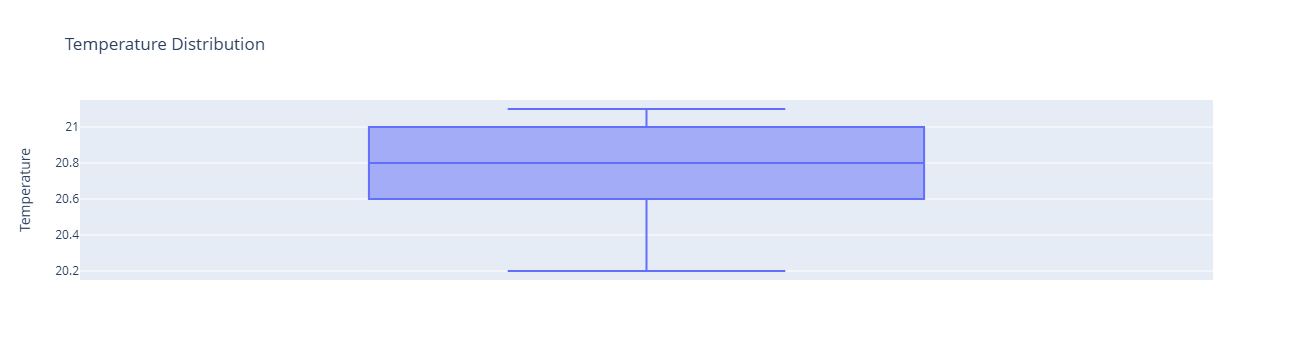

In [93]:
# Plot a box plot again to check if the rencently generated dataframe contains any outliers
fig_box_rm = px.box(filtered_df , y = "Temperature" , title = "Temperature Distribution")
fig_box_rm.show()

In [94]:
# Now proceed with the step of building the model
# Create a model Linear Regression model
model_filter_final = LinearRegression()

# Get the predictor and the output of the filter dataframe
X_filter_final = filtered_df["Temperature"].values.reshape(-1,1)
y_filter_final = filtered_df["Humidity"]

# Fit the model
model_filter_final.fit(X_filter,y_filter)

LinearRegression()

In [95]:
X_regression_rm = np.linspace(start = X_filter_final.min() , stop = X_filter_final.max() , num = 100 )
y_regression_rm = model.predict(X_regression_rm.reshape(-1,1))

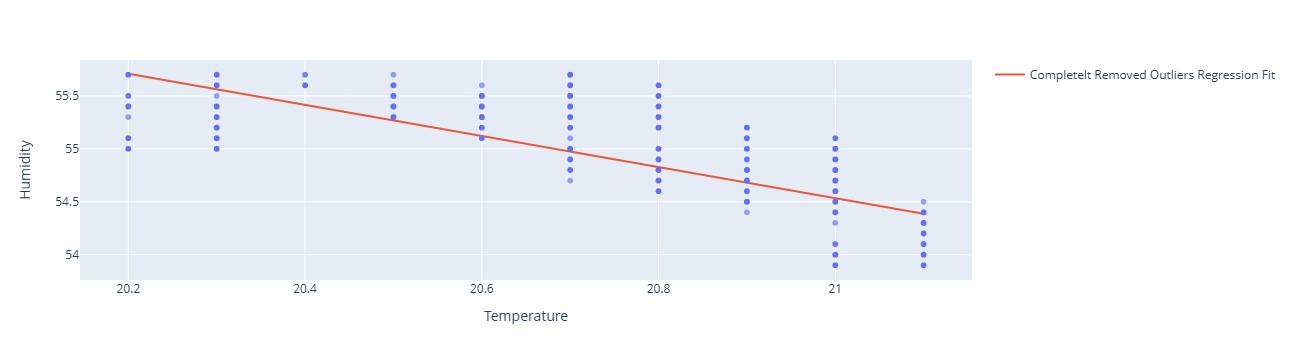

In [96]:
# Draw a s scatter plot as well as the regression line
fig_filter_rm = px.scatter(filtered_df, x = "Temperature" , y = "Humidity" , opacity = 0.65)
fig_filter_rm.add_traces(go.Scatter(x = X_regression_rm , y = y_regression_rm , name ="Completelt Removed Outliers Regression Fit"))
fig_filter_rm.show()

In [98]:
# Calculate the MSE of the this model
# Make predictions based on the removed outliers data frame
y_pred_rm = model_filter.predict(X_filter_final)

mse_rm= mean_squared_error(y_filter_final,y_pred_rm)
print(f"Mean Square Error of the removed outliers model: {mse_rm}")

Mean Square Error of the removed outliers model: 0.09808668697882954


In [100]:
# Calculate the R^2 score of the model
print(f"R^2 score of the removed outliers model: {model_filter_final.score(X_filter_final, y_filter_final)}")

R^2 score of the removed outliers model: 0.5180194628320673


#### In our final model, all data points classified as outliers have been eliminated entirely. While the Mean Squared Error (MSE) decreased little, the accuracy ratings dropped significantly.

#### In conclusion, despite the removal of outliers in multiple stages, the slope of the regression line remained constant, showing that the underlying relationship between the variables was consistent. This implies that, while the outliers may have added some variability, they did not substantially affect the direction or strength of the relationship reflected by the slope.
#### More importantly, our solution demonstrates that, while outliers can occasionally affect exploratory data analysis (EDA) and cause imbalances, they also contain essential information that is critical for model development. Removing these outliers may appear to be a good way to tidy up the data, but it can have a substantial influence on the model's performance because these points frequently capture important fluctuations in the data that are required for correct predictions. Therefore, careful thought is required when selecting whether to delete outliers, as they may contribute more to the model's accuracy than initially apparent.